<a href="https://colab.research.google.com/github/OviedoMarco/DataScience/blob/MENU/Series_de_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo
Desde mi primera semana en esta plataforma, me ha fascinado el tema del **análisis de series de tiempo.** Este núcleo está preparado para ser un contenedor de muchos temas amplios en el campo del análisis de series de tiempo. Mi motivo es hacer de esta la referencia definitiva al análisis de series de tiempo tanto para principiantes como para personas experimentadas.

# Algunas cosas importantes
1. Este kernel **es un trabajo en progreso, por lo que cada vez que lo vea en su feed de inicio y lo abra, seguramente encontrará contenido nuevo.**
2. Hago esto solo después de completar varios cursos en este campo. Continúo estudiando conceptos más avanzados para proporcionar más conocimientos y contenido.
3. Si hay alguna sugerencia o algún tema específico que le gustaría que cubriera, por favor mencione eso en los comentarios.
4. **Si le gusta mi trabajo, asegúrese de votar a favor** (presione el botón Me gusta) este kernel para que parezca más relevante y significativo para la comunidad.

In [ ]:
# Importando bibliotecas
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Arriba hay una plantilla de estilo especial para matplotlib, muy útil para visualizar datos de series de tiempo
%matplotlib inline

from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math


- <a href='#1'>1. Introducción a la fecha y la hora</a>
    - <a href='#1.1'>1.1 Importación de datos de series temporales</a>
    - <a href='#1.2'> 1.2 Limpieza y preparación de datos de series temporales</a>
    - <a href='#1.3'> 1.3 Visualización de los conjuntos de datos</a>
    - <a href='#1.4'> 1.4 Marcas de tiempo y períodos</a>
    - <a href='#1.5'> 1.5 Uso de date_range</a>
    - <a href='#1.6'> 1.6 Uso de to_datetime</a>
    - <a href='#1.7'> 1.7 Cambios y retrasos</a>
    - <a href='#1.8'> 1.8 Remuestreo</a>
- <a href='#2'> 2. Finanzas y estadísticas</a>
    - <a href='#2.1'> 2.1 Cambio porcentual</a>
    - <a href='#2.2'> 2.2 Rentabilidad de acciones</a>
    - <a href='#2.3'> 2.3 Cambio absoluto en filas sucesivas</a>
    - <a href='#2.4'> 2.4 Comparación de dos o más series temporales</a>
    - <a href='#2.5'> 2.5 Funciones de ventana</a>
    - <a href='#2.6'> 2.6 gráficos OHLC</a>
    - <a href='#2.7'> 2.7 Gráficos de velas</a>
    - <a href='#2.8'> 2.8 Autocorrelación y autocorrelación parcial </a>
- <a href='#3'> 3. Descomposición de series de tiempo y paseos aleatorios </a>
    - <a href='#3.1'> 3.1 Tendencias, estacionalidad y ruido </a>
    - <a href='#3.2'> 3.2 Ruido blanco </a>
    - <a href='#3.3'> 3.3 Paseo aleatorio </a>
    - <a href='#3.4'> 3.4 Estacionariedad </a>
- <a href='#4'> 4. Modelado usando modelos de estadísticas </a>
    - <a href='#4.1'> 4.1 Modelos de RA </a>
    - <a href='#4.2'> 4.2 modelos MA </a>
    - <a href='#4.3'> 4.3 modelos ARMA </a>
    - <a href='#4.4'> 4.4 modelos ARIMA </a>
    - <a href='#4.5'> 4.5 modelos VAR </a>
    - <a href='#4.6'> 4.6 Métodos de espacio de estado </a>
        - <a href='#4.6.1'> 4.6.1 Modelos SARIMA </a>
        - <a href='#4.6.2'> 4.6.2 Componentes no observados </a>
        - <a href='#4.6.3'> 4.6.3 Modelos de factor dinámico </a>

# <a id='#1'> 1. Introducción a la fecha y la hora </a>

## <a id='1.1'> 1.1 Importación de datos de series temporales </a>

### ¿Cómo importar datos?
Primero, importamos todos los conjuntos de datos necesarios para este kernel. La columna de serie de tiempo requerida se importa como una columna de fecha y hora usando el parámetro **parse_dates** y también se selecciona como índice del marco de datos usando el parámetro **index_col**.
#### Datos en uso: -
1. Datos de acciones de Google
2. Humedad en diferentes ciudades del mundo
3. Datos de acciones de Microsoft
3. Presión en diferentes ciudades del mundo

In [ ]:
google = pd.read_csv('/content/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-03-01,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-04-01,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-05-01,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-06-01,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-09-01,233.44,236.94,230.70,233.68,12795837,GOOGL


In [ ]:
humidity = pd.read_csv('/content/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,37.0,45.0,68.0,32.0,31.0,32.0,52.0,32.0,32.0,82.0,39.0,47.0,21.0,NaN,20.0,45.0,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,35.0,42.0,73.0,27.0,31.0,37.0,65.0,34.0,32.0,73.0,39.0,47.0,21.0,NaN,23.0,48.0,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,38.0,42.0,50.0,27.0,30.0,37.0,96.0,36.0,39.0,77.0,42.0,53.0,24.0,NaN,27.0,52.0,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,37.0,45.0,49.0,30.0,35.0,46.0,75.0,39.0,52.0,82.0,52.0,73.0,38.0,NaN,36.0,64.0,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,48.0,42.0,52.0,32.0,38.0,46.0,86.0,41.0,52.0,100.0,56.0,88.0,41.0,NaN,42.0,60.0,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


## <a id='1.2'> 1.2 Limpieza y preparación de datos de series temporales </a>

### ¿Cómo preparar datos?
Los datos de existencias de Google no tienen valores perdidos, pero los datos de humedad tienen su parte justa de valores perdidos. Se limpia usando el método **fillna()** con el parámetro **ffill** que propaga la última observación válida para llenar los vacíos

In [ ]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,92.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,81.0,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,90.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,79.0,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,89.0,70.0,65.0,71.0,70.0,99.0,76.0,94.0,74.0,87.0,87.0,82.0,93.0,77.0,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,92.0,86.0,88.0,69.0,65.0,71.0,69.0,99.0,76.0,94.0,74.0,86.0,87.0,81.0,93.0,76.0,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


## <a id='1.3'> 1.3 Visualización de los conjuntos de datos </a>

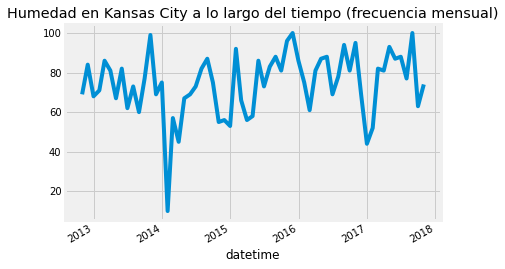

In [ ]:
humidity["Kansas City"].asfreq('M').plot() # El método asfreq se utiliza para convertir una serie de tiempo a una frecuencia especificada. Aquí está la frecuencia mensual.
plt.title('Humedad en Kansas City a lo largo del tiempo (frecuencia mensual)')
plt.show()

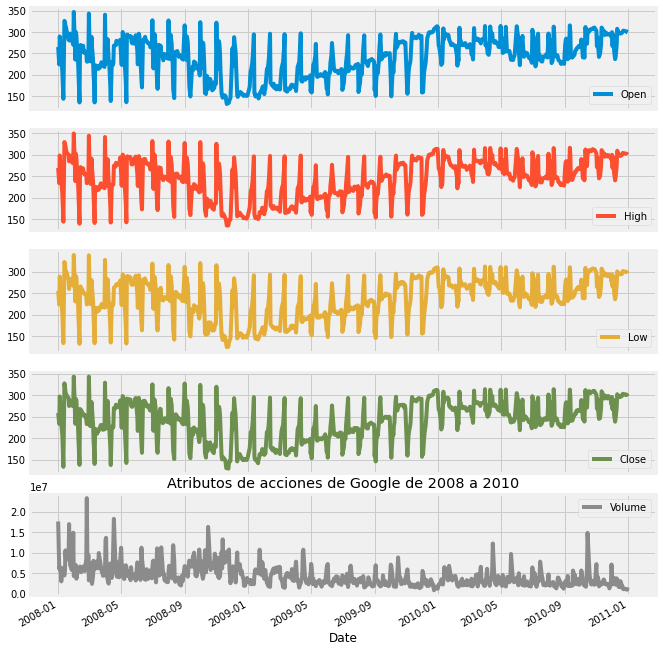

In [ ]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Atributos de acciones de Google de 2008 a 2010')
plt.savefig('stocks.png')
plt.show()

## <a id='1.4'> 1.4 Marcas de tiempo y períodos </a>

### ¿Qué son las marcas de tiempo y los períodos y para qué sirven?
Las marcas de tiempo se utilizan para representar un punto en el tiempo. Los períodos representan un intervalo en el tiempo. Los períodos se pueden usar para verificar si un evento específico en el período dado. También se pueden convertir a la forma del otro.

In [ ]:
# # Creación de una marca de tiempo
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [ ]:
# Creando un período
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [ ]:
# Verificando si la marca de tiempo dada existe en el período dado
period.start_time < timestamp < period.end_time

True

In [ ]:
# Conversión de marca de tiempo en período
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [ ]:
# Conversión de período en marca de tiempo
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

## <a id='1.5'> 1.5 Uso de date_range </a>

### ¿Qué es date_range y cómo es útil?
**date_range** es un método que devuelve un índice de fecha y hora de frecuencia fija. Es muy útil al crear su propio atributo de serie temporal para datos preexistentes o al organizar todos los datos en torno al atributo de serie temporal creado por usted.

In [ ]:
# Crear un índice de fecha y hora con frecuencia diaria
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Creación de un índice de fecha y hora con frecuencia mensual
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
# Crear un índice de fecha y hora sin especificar la fecha de inicio y usar períodos
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Crear un índice de fecha y hora que especifique la fecha de inicio, la fecha de finalización y los períodos
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

## <a id='1.6'> 1.6 Uso de to_datetime </a>

pandas.to_datetime () se utiliza para convertir argumentos a fecha y hora. Aquí, un DataFrame se convierte en una serie de fecha y hora.

In [ ]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [ ]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [ ]:
df = pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

## <a id='1.7'> 1.7 Cambios y retrasos </a>

Podemos cambiar el índice por el número deseado de períodos con una frecuencia de tiempo opcional. Esto es útil cuando se compara la serie temporal con un pasado de sí mismo.

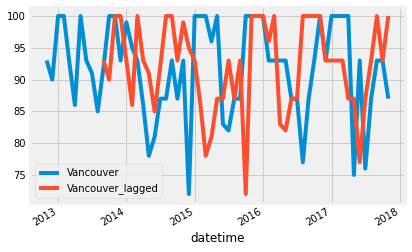

In [ ]:
humidity["Vancouver"].asfreq('M').plot(legend=True)
shifted = humidity["Vancouver"].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

## <a id='#1.8'> 1.8 Remuestreo </a>
**Upsampling**: la serie temporal se vuelve a muestrear de baja frecuencia a alta frecuencia (frecuencia mensual a diaria). Implica completar o interpolar los datos faltantes.

**Submuestreo**: la serie de tiempo se vuelve a muestrear de alta frecuencia a baja frecuencia (frecuencia semanal a mensual). Implica la agregación de datos existentes.


In [ ]:
# Usemos datos de presión para demostrar esto
pressure = pd.read_csv('/content/pressure.csv', index_col='datetime', parse_dates=['datetime'])
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,1031.0,NaN,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,1022.0,1021.0,1021.0,1020.0,1018.0,1023.0,1025.0,1023.0,1025.0,1024.0,1027.0,1021.0,1023.0,NaN,1024.0,1026.0,1021.0,NaN,1021.0,1017.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,1030.0,NaN,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,1021.0,1021.0,1021.0,1021.0,1017.0,1022.0,1024.0,1022.0,1024.0,1023.0,1027.0,1021.0,1023.0,NaN,1024.0,1026.0,1021.0,NaN,1023.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,1030.0,NaN,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,1021.0,1021.0,1020.0,1020.0,1016.0,1021.0,1024.0,1023.0,1024.0,1023.0,1027.0,1022.0,1023.0,NaN,1024.0,1026.0,1022.0,NaN,1024.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,1029.0,NaN,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,1021.0,1021.0,1020.0,1019.0,1015.0,1021.0,1023.0,1023.0,1024.0,1023.0,1027.0,1022.0,1023.0,NaN,1024.0,1027.0,1023.0,NaN,1026.0,1022.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,1029.0,NaN,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,1021.0,1021.0,1020.0,1019.0,1016.0,1021.0,1023.0,1023.0,1023.0,1024.0,1027.0,1022.0,1024.0,NaN,1025.0,1027.0,1024.0,NaN,1027.0,1023.0,NaN,NaN,NaN,NaN,NaN,NaN


¡Suspiro! Se requiere mucha limpieza.

In [ ]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,1021.0,1031.0,1013.0,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,1022.0,1021.0,1021.0,1020.0,1018.0,1023.0,1025.0,1023.0,1025.0,1024.0,1027.0,1021.0,1023.0,1015.0,1024.0,1026.0,1021.0,1020.0,1021.0,1017.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 21:00:00,1021.0,1030.0,1013.0,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,1021.0,1021.0,1021.0,1021.0,1017.0,1022.0,1024.0,1022.0,1024.0,1023.0,1027.0,1021.0,1023.0,1015.0,1024.0,1026.0,1021.0,1020.0,1023.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 22:00:00,1021.0,1030.0,1013.0,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,1021.0,1021.0,1020.0,1020.0,1016.0,1021.0,1024.0,1023.0,1024.0,1023.0,1027.0,1022.0,1023.0,1015.0,1024.0,1026.0,1022.0,1020.0,1024.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 23:00:00,1021.0,1029.0,1013.0,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,1021.0,1021.0,1020.0,1019.0,1015.0,1021.0,1023.0,1023.0,1024.0,1023.0,1027.0,1022.0,1023.0,1015.0,1024.0,1027.0,1023.0,1020.0,1026.0,1022.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-30 00:00:00,1021.0,1029.0,1013.0,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,1021.0,1021.0,1020.0,1019.0,1016.0,1021.0,1023.0,1023.0,1023.0,1024.0,1027.0,1022.0,1024.0,1015.0,1025.0,1027.0,1024.0,1020.0,1027.0,1023.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0


In [ ]:
pressure = pressure.fillna(method='bfill')
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1009.0,1011.0,1012.0,1010.0,1014.0,1005.0,1011.0,1006.0,1016.0,1009.0,1012.0,1011.0,1015.0,1012.0,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1011.0,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1011.0,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1010.0,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 17:00:00,807.0,1024.0,1009.0,1029.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1010.0,1014.0,1012.0,863.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


Primero, usamos el parámetro **ffill** que propaga la última observación válida para llenar los vacíos. Luego usamos **bfill** para proponer la siguiente observación válida para llenar los vacíos.

In [ ]:
# Forma antes del remuestreo (reducción de muestreo)
pressure.shape

(45252, 36)

In [ ]:
# Reducimos la muestra de frecuencia por hora a 3 días agregada usando la media
pressure = pressure.resample('3D').mean()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,1014.305085,1011.525424,1009.881356,1011.915254,1012.949153,1009.525424,1012.372881,1004.627119,1008.949153,1006.593220,1013.661017,1009.271186,1011.372881,1011.915254,1012.745763,1005.711864,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.000000,1013.000000,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,1017.708333,1016.416667,1017.652778,1017.305556,1015.111111,1018.388889,1015.875000,1020.652778,1018.388889,1021.430556,1017.277778,1020.000000,1021.222222,1018.500000,1019.069444,1006.958333,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.000000,1013.000000,990.083333
2012-10-07,1013.930556,1017.444444,1016.597222,1018.736111,1013.416667,1014.222222,1012.888889,1011.861111,1005.833333,1020.458333,1020.402778,1022.819444,1018.791667,1022.986111,1017.388889,1023.111111,1020.569444,1021.111111,1021.180556,1017.791667,1019.388889,1015.347222,1017.833333,1013.958333,1018.625000,1007.694444,1017.958333,1016.750000,1014.152778,1016.305556,982.972222,1013.027778,1007.555556,1013.000000,1013.000000,989.833333
2012-10-10,1015.000000,1015.430556,1014.833333,1018.416667,1010.694444,1014.013889,1000.166667,1005.611111,986.000000,984.486111,1015.236111,1016.277778,1017.791667,1014.611111,1009.625000,1019.069444,1015.458333,1019.333333,1017.208333,1018.208333,1015.708333,1018.625000,1019.513889,1016.222222,1015.611111,1007.541667,1018.694444,1017.916667,1016.166667,1017.319444,979.763889,1006.527778,998.763889,1012.333333,1012.333333,987.888889
2012-10-13,1008.152778,1018.111111,1021.069444,1015.930556,1017.277778,1018.375000,1015.666667,1015.500000,1013.625000,1010.444444,1017.611111,1016.555556,1017.972222,1013.680556,1014.763889,1016.805556,1016.347222,1021.388889,1018.708333,1023.305556,1019.472222,1021.569444,1025.500000,1017.333333,1021.375000,1016.097222,1025.055556,1024.388889,1020.805556,1023.736111,984.527778,1013.027778,1007.194444,1013.000000,1013.000000,990.430556


In [ ]:
# Forma después del remuestreo (reducción de muestreo)
pressure.shape

(629, 36)

Quedan muchas menos filas. Ahora, realizaremos una muestra ascendente de la frecuencia de 3 días a la frecuencia diaria

In [ ]:
pressure = pressure.resample('D').pad()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,1014.305085,1011.525424,1009.881356,1011.915254,1012.949153,1009.525424,1012.372881,1004.627119,1008.949153,1006.593220,1013.661017,1009.271186,1011.372881,1011.915254,1012.745763,1005.711864,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-02,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,1014.305085,1011.525424,1009.881356,1011.915254,1012.949153,1009.525424,1012.372881,1004.627119,1008.949153,1006.593220,1013.661017,1009.271186,1011.372881,1011.915254,1012.745763,1005.711864,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-03,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,1014.305085,1011.525424,1009.881356,1011.915254,1012.949153,1009.525424,1012.372881,1004.627119,1008.949153,1006.593220,1013.661017,1009.271186,1011.372881,1011.915254,1012.745763,1005.711864,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,1017.708333,1016.416667,1017.652778,1017.305556,1015.111111,1018.388889,1015.875000,1020.652778,1018.388889,1021.430556,1017.277778,1020.000000,1021.222222,1018.500000,1019.069444,1006.958333,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333
2012-10-05,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,1017.708333,1016.416667,1017.652778,1017.305556,1015.111111,1018.388889,1015.875000,1020.652778,1018.388889,1021.430556,1017.277778,1020.000000,1021.222222,1018.500000,1019.069444,1006.958333,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333


In [ ]:
# Forma después de remuestrear (upsampling)
pressure.shape

(1885, 36)

Nuevamente un aumento en el número de filas. El remuestreo es genial cuando se usa correctamente.

# <a id='2'> 2. Finanzas y estadísticas </a>

## <a id='2.1'> 2.1 Cambio porcentual </a>

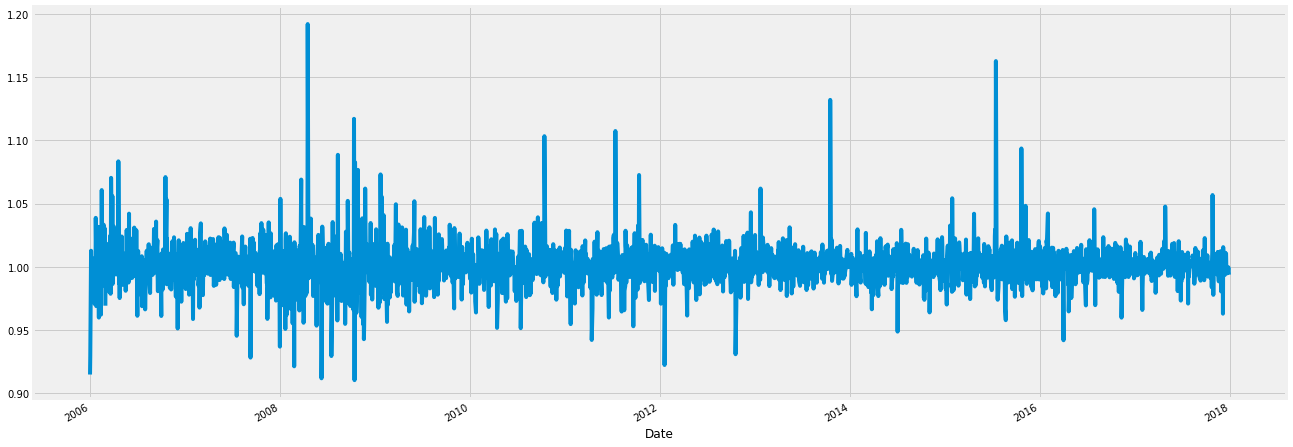

In [ ]:
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,8))

## <a id='2.2'> 2.2 Rentabilidad de acciones </a>

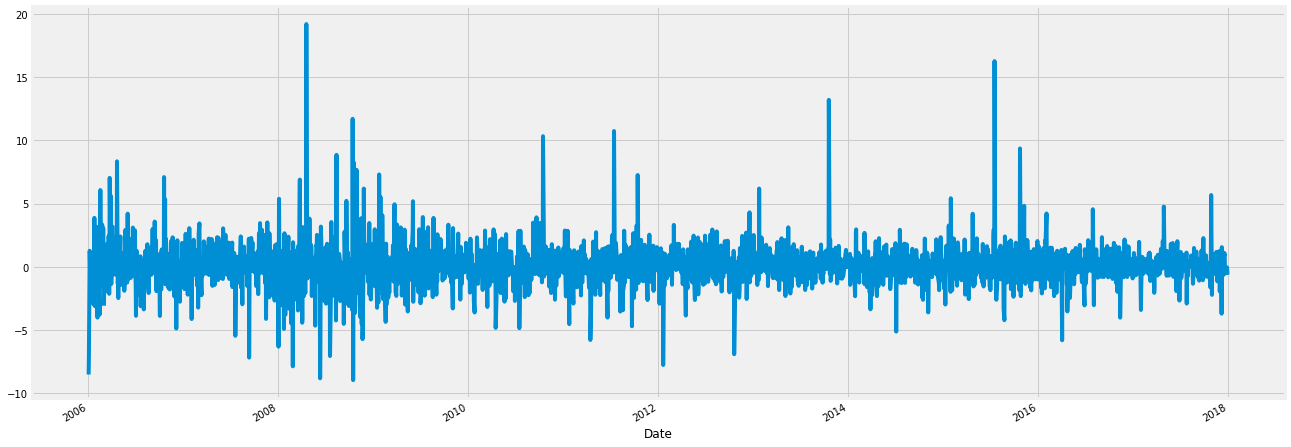

In [ ]:
google['Return'] = google.Change.sub(1).mul(100)
google['Return'].plot(figsize=(20,8))

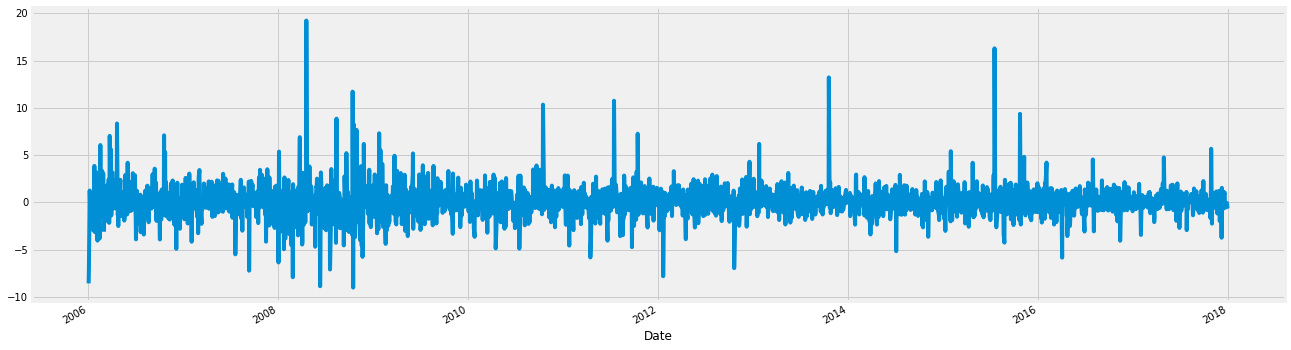

In [ ]:
google.High.pct_change().mul(100).plot(figsize=(20,6)) # Otra forma de calcular las devoluciones

## <a id='2.3'> 2.3 Cambio absoluto en filas sucesivas </a>

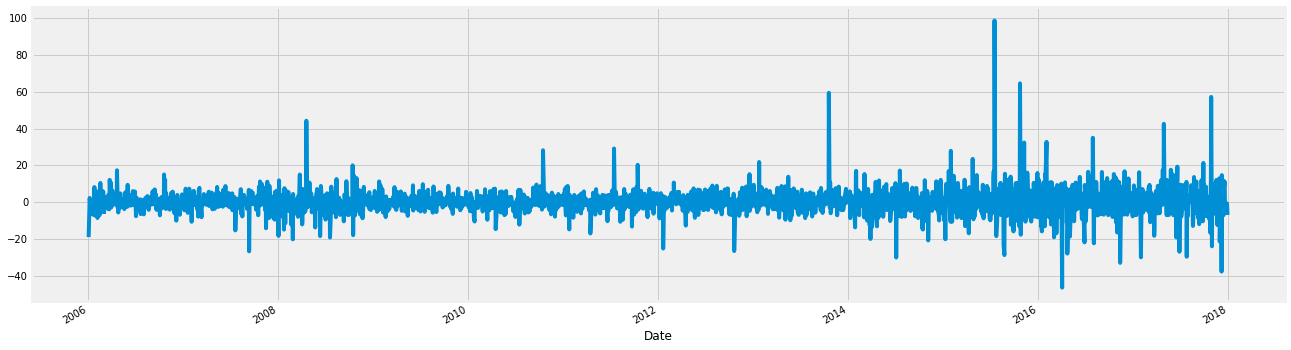

In [ ]:
google.High.diff().plot(figsize=(20,6))

## <a id='2.4'> 2.4 Comparación de dos o más series de tiempo </a>

Compararemos 2 series de tiempo normalizándolas. Esto se logra dividiendo cada elemento de la serie de tiempo de todas las series de tiempo por el primer elemento. De esta manera, ambas series comienzan en el mismo punto y se pueden comparar fácilmente.

In [ ]:
# Elegimos acciones de microsoft para compararlas con google
microsoft = pd.read_csv('/content/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

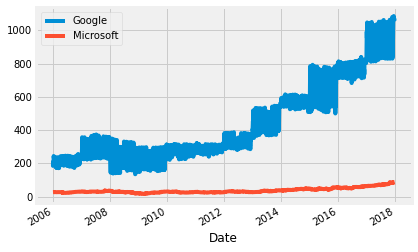

In [ ]:
# Plotting antes de la normalización
google.High.plot()
microsoft.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

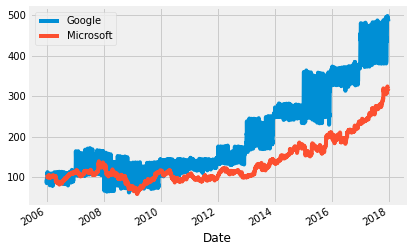

In [ ]:
# Normalización y comparación
# Ambas acciones parten de 100
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google','Microsoft'])
plt.show()

Puede ver claramente cómo google supera a microsoft a lo largo del tiempo.

## <a id='2.5'> 2.5 Funciones de windows </a>
Las funciones de ventana se utilizan para identificar subperíodos, calcula submétricas de subperíodos.

**Rolling** - Mismo tamaño y deslizante

**Expanding**: contiene todos los valores anteriores

In [ ]:
# Funciones moviles de Windows
rolling_google = google.High.rolling('90D').mean()
google.High.plot()
rolling_google.plot()
plt.legend(['Alto','Media rodante'])
# Trazar una media móvil de windows de 90 días con el atributo Alto original de las acciones de Google
plt.show()

ValueError: ignored

Ahora, observe que el gráfico de la media móvil es una versión más suave del gráfico original.

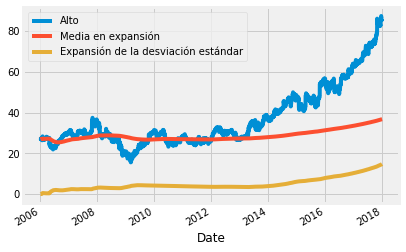

In [ ]:
# Ampliación de las funciones de windows
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['Alto','Media en expansión','Expansión de la desviación estándar'])
plt.show()

## <a id='2.6'> 2.6 gráficos OHLC </a>
Un gráfico OHLC es cualquier tipo de gráfico de precios que muestra el precio de apertura, máximo, mínimo y de cierre de un determinado período de tiempo. Los gráficos de apertura-alto-bajo-cierre (o gráficos OHLC) se utilizan como una herramienta de negociación para visualizar y analizar los cambios de precios a lo largo del tiempo para valores, divisas, acciones, bonos, materias primas, etc. Los gráficos OHLC son útiles para interpretar el día. sentimiento actual del mercado y previsión de cualquier cambio de precio futuro a través de los patrones producidos.

El eje y en un gráfico OHLC se utiliza para la escala de precios, mientras que el eje x es la escala de tiempo. En cada período de tiempo, un gráfico OHLC traza un símbolo que representa dos rangos: los precios más altos y más bajos negociados, y también el precio de apertura y cierre en ese período de tiempo único (por ejemplo, en un día). En el símbolo de rango, los rangos de precios altos y bajos están representados por la longitud de la línea vertical principal. Los precios de apertura y cierre están representados por la posición vertical de las marcas de graduación que aparecen a la izquierda (que representa el precio de apertura) y a la derecha (que representa el precio de cierre) de la línea vertical alto-bajo.

Se puede asignar color a cada símbolo del gráfico OHLC, para distinguir si el mercado es "alcista" (el precio de cierre es más alto que el que abrió) o "bajista" (el precio de cierre es más bajo que el que abrió).

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg">

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/OHLC_chart.html)

In [ ]:
# OHLC chart of June 2008
trace = go.Ohlc(x=google['06-2008'].index,
                open=google['06-2008'].Open,
                high=google['06-2008'].High,
                low=google['06-2008'].Low,
                close=google['06-2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

AssertionError: ignored

In [ ]:
# OHLC chart of 2008
trace = go.Ohlc(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [ ]:
# OHLC chart of 2008
trace = go.Ohlc(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

## <a id='2.7'> 2.7 Gráficos de velas </a>
Este tipo de gráfico se utiliza como herramienta de negociación para visualizar y analizar los movimientos de precios a lo largo del tiempo para valores, derivados, divisas, acciones, bonos, materias primas, etc. por lo tanto, no deben confundirse entre sí.

Los gráficos de velas muestran varios bits de información de precios, como el precio de apertura, el precio de cierre, el precio más alto y el precio más bajo mediante el uso de símbolos similares a velas. Cada símbolo representa la actividad comercial comprimida durante un período de tiempo único (un minuto, una hora, un día, un mes, etc.). Cada símbolo de vela se traza a lo largo de una escala de tiempo en el eje x, para mostrar la actividad comercial a lo largo del tiempo.

El rectángulo principal del símbolo se conoce como el cuerpo real, que se utiliza para mostrar el rango entre el precio de apertura y cierre de ese período de tiempo. Mientras que las líneas que se extienden desde la parte inferior y superior del cuerpo real se conocen como sombras inferiores y superiores (o mecha). Cada sombra representa el precio más alto o más bajo negociado durante el período de tiempo representado. Cuando el mercado es alcista (el precio de cierre es más alto de lo que abrió), entonces el cuerpo es típicamente de color blanco o verde. Pero cuando el mercado es bajista (el precio de cierre es más bajo que el de apertura), entonces el cuerpo suele ser de color negro o rojo.

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/candlestick_chart.svg">

Los gráficos de velas son excelentes para detectar y predecir las tendencias del mercado a lo largo del tiempo y son útiles para interpretar el sentimiento diario del mercado, a través del color y la forma de cada símbolo de velas. Por ejemplo, cuanto más largo es el cuerpo, más intensa es la presión de compra o de venta. Mientras que, un cuerpo muy corto, indicaría que hay muy poco movimiento de precios en ese período de tiempo y representa una consolidación.

Los gráficos de velas ayudan a revelar la psicología del mercado (el miedo y la codicia que experimentan los vendedores y compradores) a través de varios indicadores, como la forma y el color, pero también a través de los muchos patrones identificables que se pueden encontrar en los gráficos de velas. En total, hay 42 patrones reconocidos que se dividen en patrones simples y complejos. Estos patrones que se encuentran en los gráficos de velas son útiles para mostrar las relaciones de precios y pueden usarse para predecir el posible movimiento futuro del mercado. Puede encontrar una lista y descripción de cada patrón aquí.

Tenga en cuenta que los gráficos de velas no expresan los eventos que tienen lugar entre el precio de apertura y el de cierre, solo la relación entre los dos precios. Por lo tanto, no se puede decir qué tan volátil fue el comercio dentro de ese período de tiempo único.

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/candlestick_chart.html)

In [ ]:
# Candlestick chart of march 2008
trace = go.Candlestick(x=google['03-2008'].index,
                open=google['03-2008'].Open,
                high=google['03-2008'].High,
                low=google['03-2008'].Low,
                close=google['03-2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [ ]:
# Candlestick chart of 2008
trace = go.Candlestick(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [ ]:
# Candlestick chart of 2006-2018
trace = go.Candlestick(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_candlestick')

## <a id='2.8'> 2.8 Autocorrelación y autocorrelación parcial </a>
* Autocorrelación: la función de autocorrelación (ACF) mide cómo se correlaciona una serie consigo misma en diferentes rezagos.
* Autocorrelación parcial: la función de autocorrelación parcial se puede interpretar como una regresión de la serie contra sus rezagos anteriores. Los términos se pueden interpretar de la misma manera que una regresión lineal estándar, es decir, la contribución de un cambio en ese rezago particular mientras se mantienen constantes los demás. 

Source: [Quora](https://www.quora.com/What-is-the-difference-among-auto-correlation-partial-auto-correlation-and-inverse-auto-correlation-while-modelling-an-ARIMA-series)

## Autocorrelación

In [ ]:
# Autocorrelation of humidity of San Diego
plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

Como todos los rezagos son cercanos a 1 o al menos mayores que el intervalo de confianza, son estadísticamente significativos.

## Autocorrelación parcial

In [ ]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["San Diego"],lags=25)
plt.show()

Aunque es estadísticamente significativo, la autocorrelación parcial después de las 2 primeras etapas es muy baja.

In [ ]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(microsoft["Close"],lags=25)
plt.show()

Aquí, solo los rezagos 0, 1 y 20 son estadísticamente significativos.

# <a id='3'> 3. Descomposición de series de tiempo y paseos aleatorios </a>

## <a id='3.1'> 3.1. Tendencias, estacionalidad y ruido </a>
Estos son los componentes de una serie temporal.
* Tendencia: pendiente constante hacia arriba o hacia abajo de una serie de tiempo
* Estacionalidad: patrón periódico claro de una serie de tiempo (como función sinusoidal)
* Ruido: valores atípicos o valores perdidos

In [ ]:
# Let's take Google stocks High for this
google["High"].plot(figsize=(16,8))

In [ ]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],freq=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

* Existe una clara tendencia al alza en el gráfico anterior.
* También puede ver el cambio estacional uniforme.
* Ruido no uniforme que representa valores atípicos y perdidos

## <a id='3.2'> 3.2. Ruido blanco </a>
El ruido blanco tiene ...
* Media constante
* Varianza constante
* Cero autocorrelación en todos los rezagos

In [ ]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

In [ ]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

Vea cómo todos los retrasos son estadísticamente insignificantes, ya que se encuentran dentro del intervalo de confianza (parte sombreada).

## <a id='3.3'> 3.3. Paseo aleatorio </a>
Un paseo aleatorio es un objeto matemático, conocido como proceso estocástico o aleatorio, que describe un camino que consiste en una sucesión de pasos aleatorios en algún espacio matemático como los números enteros.

En general si hablamos de acciones, precio de hoy = precio de ayer + ruido

# P <sub> t </sub> = P <sub> t-1 </sub> + ε <sub> t </sub>

No se pueden pronosticar caminatas aleatorias porque bueno, el ruido es aleatorio.

Caminata aleatoria con deriva (deriva (μ) es cero)
#### P<sub>t</sub> - P<sub>t-1</sub> = μ + ε<sub>t</sub> 
<br>
Prueba de regresión para caminata aleatoria
####P<sub>t</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>

####Equivalente a P <sub> t </sub> - P <sub> t-1 </sub> = α + βP <sub> t-1 </sub> + ε <sub> t </ sub >  
<br>

Prueba:
#### H <sub> 0 </sub>: β = 1 (Este es un paseo aleatorio)

#### H <sub> 1 </sub>: β <1 (Este no es un paseo aleatorio)<br>

Prueba de Dickey-Fuller:

#### H <sub> 0 </sub>: β = 0 (Este es un paseo aleatorio)

#### H <sub> 1 </sub>: β <0 (Este no es un paseo aleatorio)

### Augmented Dickey-Fuller test
An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In [ ]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
adf = adfuller(microsoft["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(google["Volume"])
print("p-value of google: {}".format(float(adf[1])))

##### As microsoft has p-value 0.0003201525 which is less than 0.05, null hypothesis is rejected and this is not a random walk.
##### Now google has p-value 0.0000006510 which is more than 0.05, null hypothesis is rejected and this is not a  random walk.

### Generating a random walk

In [ ]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [ ]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

## <a id='3.4'> 3.4 Estacionariedad </a>
Una serie de tiempo estacionaria es aquella cuyas propiedades estadísticas como la media, la varianza, la autocorrelación, etc., son todas constantes en el tiempo.
Estacionariedad fuerte: es un proceso estocástico cuya distribución de probabilidad conjunta incondicional no cambia cuando se desplaza en el tiempo. En consecuencia, parámetros como la media y la varianza tampoco cambian con el tiempo.
* Estacionariedad débil: es un proceso donde media, varianza, autocorrelación son constantes a lo largo del tiempo.

La estacionariedad es importante ya que las series no estacionarias que dependen del tiempo tienen demasiados parámetros para tener en cuenta al modelar la serie de tiempo. El método diff () puede convertir fácilmente una serie no estacionaria en una serie estacionaria.

Intentaremos descomponer el componente estacional de la serie de tiempo descompuesta anterior.

In [ ]:
# La trama no estacionaria original
decomposed_google_volume.trend.plot()

In [ ]:
# La nueva parcela estacionaria
decomposed_google_volume.trend.diff().plot()

# <a id='4'> 4. Modelado con herramientas de estadísticas </a>

## <a id='4.1'> 4.1 Modelos de RA </a>
 Un modelo autorregresivo (AR) es una representación de un tipo de proceso aleatorio; como tal, se utiliza para describir ciertos procesos que varían en el tiempo en la naturaleza, la economía, etc. El modelo autorregresivo especifica que la variable de salida depende linealmente de sus propios valores previos y de un término estocástico (un término imperfectamente predecible); por tanto, el modelo tiene la forma de una ecuación en diferencias estocásticas.
 #### Modelo AR (1)
 R <sub> t </sub> = μ + ϕR <sub> t-1 </sub> + ε <sub> t </sub>
 ##### Como RHS tiene solo un valor rezagado (R <sub> t-1 </sub>), esto se llama modelo AR de orden 1 donde μ es la media y ε es el ruido en el tiempo t
 Si ϕ = 1, es un paseo aleatorio. De lo contrario, si ϕ = 0, es ruido blanco. De lo contrario, si -1 <ϕ <1, es estacionario. Si ϕ es -ve, hay reversión de hombres. Si ϕ es + ve, hay impulso.
 #### Modelo AR (2)
 R <sub> t </sub> = μ + ϕ <sub> 1 </sub> R <sub> t-1 </sub> + ϕ <sub> 2 </sub> R <sub> t-2 </sub> + ε <sub> t </sub>
 #### Modelo AR (3)
 R <sub> t </sub> = μ + ϕ <sub> 1 </sub> R<sub>t-1
 </sub> + ϕ <sub> 2</sub> R <sub> t-2 </sub> + ϕ <sub> 3 </sub> R <sub> t-3 </sub> + ε <sub> t </sub>

## Simulando el modelo AR (1)

In [ ]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

## Pronóstico de un modelo simulado

In [ ]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))


ϕ es de alrededor de 0.9, que es lo que elegimos como parámetro AR en nuestro primer modelo simulado.

## Predecir los modelos

In [ ]:
# Predicción del modelo AR (1) simulado
result.plot_predict(start=900, end=1010)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("La raíz del error cuadrático medio es {}.".format(rmse))

y es la gráfica predicha. ¡Muy ordenado!

In [ ]:
# Predicción del nivel de humedad de Montreal
humid = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("La raíz del error cuadrático medio es {}.".format(rmse))

No del todo impresionante. Pero probemos acciones de Google.

In [ ]:
# Predicción de precios de cierre de google
humid = ARMA(google["Close"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=900, end=1010)
plt.show()

Siempre hay mejores modelos.

## <a id='4.2'> 4.2 Modelos MA </a>
El modelo de media móvil (MA) es un enfoque común para modelar series de tiempo univariadas. El modelo de promedio móvil especifica que la variable de salida depende linealmente de los valores actuales y pasados de un término estocástico (imperfectamente predecible).
#### Modelo MA (1)
R <sub> t </sub> = μ + ϵ <sub> t </sub> 1 + θϵ <sub> t-1 </sub>

Se traduce en rendimientos de hoy = media + ruido de hoy + ruido de ayer
##### Como solo hay 1 valor rezagado en RHS, es un modelo MA de orden 1

## Simulando el modelo MA (1)

In [ ]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

## Pronóstico del modelo de MA simulado

In [ ]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

## Predicción usando modelos MA

In [ ]:
# Pronosticar y predecir la humedad de Montreal
model = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("La raíz del error cuadrático medio es {}.".format(rmse))

Ahora, para los modelos ARMA.

## <a id='4.3'> 4.3 Modelos ARMA </a>
Los modelos de media móvil autorregresiva (ARMA) proporcionan una descripción parsimoniosa de un proceso estocástico (débilmente) estacionario en términos de dos polinomios, uno para la autorregresión y el segundo para la media móvil. Es la fusión de los modelos AR y MA.
### Modelo ARMA (1,1)
### R <sub> t </sub> = μ + ϕR <sub> t-1 </sub> + ϵ <sub> t </sub> + θϵ <sub> t-1 </sub>
Básicamente, retorno de hoy = media + retorno de ayer + ruido + ruido de ayer.

## Predicción usando modelos ARMA
No estoy simulando ningún modelo porque es bastante similar a los modelos AR y MA. Solo pronósticos y predicciones para este.

In [ ]:
# Pronosticar y predecir el volumen de acciones de microsoft
model = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("La raíz del error cuadrático medio es {}.".format(rmse))

El modelo ARMA muestra resultados mucho mejores que los modelos AR y MA.

## <a id='4.4'> 4.4 Modelos ARIMA </a>
Un modelo de media móvil integrada autorregresiva (ARIMA) es una generalización de un modelo de media móvil autorregresiva (ARMA). Ambos modelos se ajustan a datos de series de tiempo para comprender mejor los datos o para predecir puntos futuros de la serie (pronóstico). Los modelos ARIMA se aplican en algunos casos donde los datos muestran evidencia de no estacionariedad, donde un paso de diferenciación inicial (correspondiente a la parte "integrada" del modelo) se puede aplicar una o más veces para eliminar la no estacionariedad.
El modelo ARIMA tiene la forma: ARIMA (p, d, q): p es el parámetro AR, d es el parámetro diferencial, q es el parámetro MA
### ARIMA (1,0,0)
**y <sub> t </sub> = a <sub> 1 </sub> y <sub> t-1 </sub> + ϵ <sub> t </sub>**
### ARIMA (1,0,1)
**y <sub> t </sub> = a <sub> 1 </sub> y <sub> t-1 </sub> + ϵ <sub> t </sub> + b <sub> 1 </sub> ϵ <sub> t-1 </sub>**
### ARIMA (1,1,1)
**Δy <sub> t </sub> = a <sub> 1 </sub> Δy <sub> t-1 </sub> + ϵ <sub> t </sub> + b<sub>1 </sub> ϵ <sub> t-1 </sub>** donde **Δy <sub> t </sub> = y <sub> t </sub> - y <sub> t-1 </sub>**

## Predicción usando el modelo ARIMA

In [ ]:
# Predecir el volumen de acciones de microsoft
rcParams['figure.figsize'] = 16, 6
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("La raíz del error cuadrático medio es {}.".format(rmse))

Taking the slight lag into account, this is a fine model.

## <a id='4.5'> 4.5 Modelos VAR </a>
La autorregresión vectorial (VAR) es un modelo de proceso estocástico que se utiliza para capturar las interdependencias lineales entre múltiples series de tiempo. Los modelos VAR generalizan el modelo autorregresivo univariado (modelo AR) al permitir más de una variable en evolución. Todas las variables en un VAR ingresan al modelo de la misma manera: cada variable tiene una ecuación que explica su evolución basada en sus propios valores rezagados, los valores rezagados de las otras variables del modelo y un término de error. El modelado VAR no requiere tanto conocimiento sobre las fuerzas que influyen en una variable como lo hacen los modelos estructurales con ecuaciones simultáneas: el único conocimiento previo requerido es una lista de variables que pueden hipotetizarse para afectarse entre sí intertemporalmente.

<img src="http://gdurl.com/VvRm">

In [ ]:
# Predecir el precio de cierre de Google y microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# error de cálculo
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("La raíz del error cuadrático medio es {}.".format(rmse))

## <a id='4.6'> 4.6 Métodos de espacio de estado </a>

Un modelo de espacio de estados general tiene la forma

y <sub> t </sub> = Z <sub> t </sub> α <sub> t </sub> + d <sub> t </sub> + ε <sub> t </sub>

α <sub> t </sub> = T <sub> t </sub> α <sub> t </sub> −1 + c <sub> t </sub> + R <sub> t </sub> η <sub> t </sub>

donde y <sub> t </sub> se refiere al vector de observación en el momento t, α <sub> t </sub> se refiere al vector de estado (no observado) en el momento t, y donde los componentes irregulares se definen como

ε <sub> t </sub> ∼N (0, H <sub> t </sub>)

η <sub> t </sub> ∼N (0, Q <sub> t </sub>)

Las variables restantes (Z <sub> t </sub>, d <sub> t </sub>, H <sub> t </sub>, T <sub> t </sub>, c <sub> t </sub>, R <sub> t </sub>, Q <sub> t </sub>) en las ecuaciones son matrices que describen el proceso. Sus nombres y dimensiones de variables son los siguientes

Z: diseño (k_endog × k_states × nobs)

d: obs_intercept (k_endog × nobs)

H: obs_cov (k_endog × k_endog × nobs)

T: transición (k_states × k_states × nobs)

c: state_intercept (k_states × nobs)

R: selección (k_states × k_posdef × nobs)

P: state_cov (k_posdef × k_posdef × nobs)

En el caso de que una de las matrices sea invariante en el tiempo (de modo que, por ejemplo, Z <sub> t </sub> = Z <sub> t </sub> +1 ∀ <sub> t </sub>) , su última dimensión puede ser de tamaño 1 en lugar de nobs de tamaño.

Esta forma genérica encapsula muchos de los modelos de series de tiempo lineales más populares (ver más abajo) y es muy flexible, lo que permite la estimación con observaciones faltantes, pronósticos, funciones de respuesta de impulso y mucho más.

Source: [statsmodels](https://www.statsmodels.org/dev/statespace.html)

## <a id='4.6.1'> 4.6.1 Modelos SARIMA </a>
Los modelos SARIMA son útiles para modelar series de tiempo estacionales, en las que la media y otras estadísticas de una temporada determinada no son estacionarias a lo largo de los años. El modelo SARIMA definido constituye una extensión directa de los modelos de media móvil autorregresiva no estacional (ARMA) y media móvil integrada autorregresiva (ARIMA) presentados

In [ ]:
# Predicción del precio de cierre de Google '
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# error de cálculo
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("La raíz del error cuadrático medio es {}.".format(rmse))

In [ ]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

## <a id='4.6.2'> 4.6.2 Componentes no observados </a>
Un UCM descompone la serie de respuesta en componentes como tendencia, estaciones, ciclos y los efectos de regresión debido a la serie de predictores. El siguiente modelo muestra un posible escenario:
<img src="http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/images/etsug_ucm0134.png">
Source: [http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm](http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm)

In [ ]:
# Predicción del precio de cierre de Google '
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# error de cálculo
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("La raíz del error cuadrático medio es {}.".format(rmse))

In [ ]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Precios de cierre de Google')
plt.show()

## <a id='4.6.3'> 4.6.3 Modelos de factor dinámico </a>
Los modelos de factores dinámicos son modelos flexibles para series de tiempo multivariadas en las que las variables endógenas observadas son funciones lineales de covariables exógenas y factores no observados, que tienen una estructura vector autorregresiva. Los factores no observados también pueden ser una función de covariables exógenas. Las alteraciones en las ecuaciones de las variables dependientes pueden estar autocorrelacionadas.

In [ ]:
# Predecir el precio de cierre de Google y microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# error de cálculo
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("La raíz del error cuadrático medio es {}.".format(rmse))

Es posible que pronto agregue más modelos de regresión y hay muchas más cosas que cubrir. **Pero en mi experiencia, los mejores modelos para el pronóstico de series de tiempo son las redes neuronales recurrentes basadas en LSTM. He preparado un tutorial detallado para eso. Aqui esta el link:<u>https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru</u>**

Referencias e influencias (estos tienen contenido y explicaciones más detallados):
* [Manipulating Time Series Data in Python](https://www.datacamp.com/courses/manipulating-time-series-data-in-python)
* [Introduction to Time Series Analysis in Python](https://www.datacamp.com/courses/introduction-to-time-series-analysis-in-python)
* [Visualizing Time Series Data in Python](https://www.datacamp.com/courses/visualizing-time-series-data-in-python)
* [VAR models and LSTM](https://www.youtube.com/watch?v=_vQ0W_qXMxk)
* [State space models](https://www.statsmodels.org/dev/statespace.html)

¡Mantente sintonizado para más! Y no olvides votar y comentar.